1.253877551020408


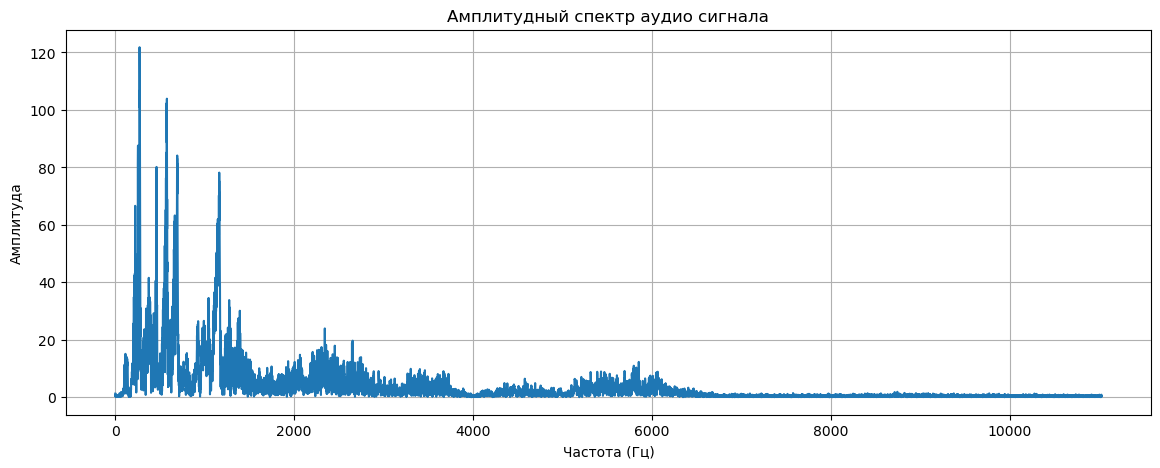

In [90]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from pydub import AudioSegment
import soundfile as sf

audio_file = "car.wav"
y, sr = librosa.load(audio_file)
print(len(y)/ sr)
y_fft = np.fft.fft(y)

# Длина аудио сигнала
n = len(y)

# Частотный диапазон
freq = np.fft.fftfreq(n, d=1/sr)

# Построение графика амплитудного спектра
plt.figure(figsize=(14, 5))
plt.plot(freq[:n//2], np.abs(y_fft)[:n//2])
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Амплитудный спектр аудио сигнала')
plt.grid()
plt.show()

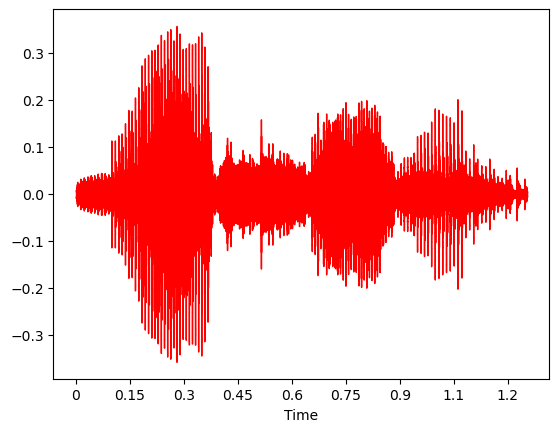

In [91]:
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(y, sr=sr,ax=ax,color='r')
plt.show()

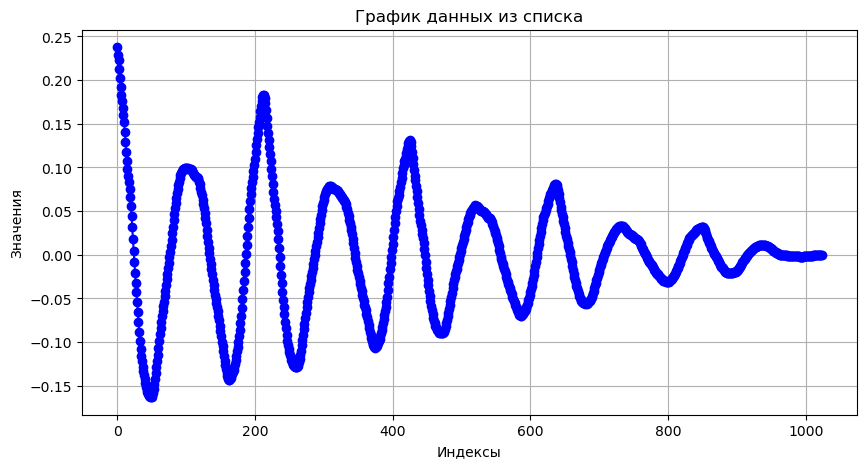

In [115]:
window = 1024
jump = 128
s = y
sig = s[0:0+window]
R = autocorrelation(sig)
indices = list(range(len(R)))

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(indices, R, marker='o', color='b', linestyle='-')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.title('График данных из списка')
plt.grid(True)
plt.show()

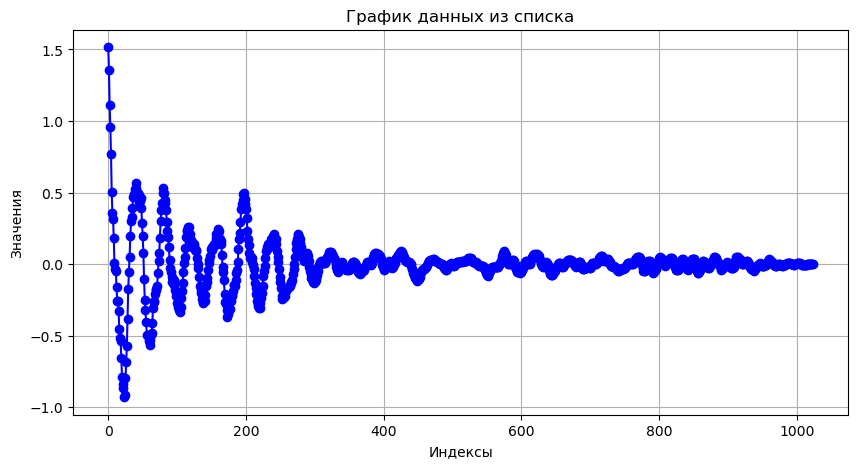

In [120]:
window = 1024
jump = 128
s = y
sig = s[8012:8012+window]
R = autocorrelation(sig)
indices = list(range(len(R)))
# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(indices, R, marker='o', color='b', linestyle='-')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.title('График данных из списка')
plt.grid(True)
plt.show()

In [121]:
def autocorrelation(sp):
    W = len(sp)
    R = np.zeros(W)
    for tau in range(W):
        for j in range(W-tau):
            if(j + tau < W):
                R[tau] += sp[j]*sp[j+tau]
    return R

def find_local_maxima(arr):
    local_maxima = []
    indx = []
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            local_maxima.append(arr[i])
            indx.append(i)
    return local_maxima, indx

def peak(arr,indx1, indx2):
    max = 0
    m_i = 0
    for i in range(len(arr)):
        if((arr[i] > max) and ( 80 < indx1[indx2[i]])):
            max = arr[i]
            m_i = i
    return m_i
    
window = 1024
jump = 128
s = y
P_T = []
for i in range(0,len(s)-window,jump):
    sig = s[i:i+window]
    R = autocorrelation(sig)
    Mx1, indx1 = find_local_maxima(R)
    #Mx2, indx2 = find_local_maxima(Mx1)
    #maxj = peak(Mx2,indx1,indx2)
    #print(maxj,flush=True)
    #print("__",len(indx2))
    #if(len(indx2) == 0):
    #    P_T.append(0)
    #    continue
    #maxj2 = indx2[maxj]
    #maxj1 = indx1[maxj2]
    P_T.append(sr/(indx1[np.argmax(Mx1)]))


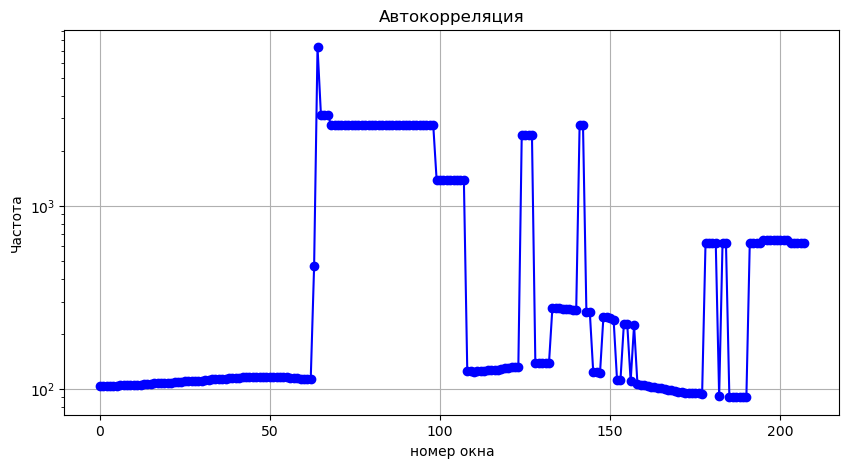

In [123]:
import matplotlib.pyplot as plt

# Данные для построения графика (предположим, что у вас есть список данных data)

# Создание списка индексов для данных
indices = list(range(len(P_T)))

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(indices, P_T, marker='o', color='b', linestyle='-')
plt.xlabel('номер окна')
plt.ylabel('Частота')
plt.title('Автокорреляция')
plt.grid(True)
plt.yscale('log')
plt.show()

In [124]:
def crosscorrelation(sp):
    W = len(sp)
    R = np.zeros(W)
    n2 = 0
    n1 = np.linalg.norm(sp)
    for tau in range(W):
        sum = 0
        for j in range(W):
            if(j+tau < W):
                sum += sp[j]*sp[j+tau]
        n2 = np.linalg.norm(sp[tau:])
        R[tau] = sum/(n1*n2)
    return R

def find_local_maxima(arr):
    local_maxima = []
    indx = []
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            local_maxima.append(arr[i])
            indx.append(i)
    return local_maxima, indx

def peak(arr,indx1, indx2):
    max = 0
    m_i = 0
    for i in range(len(arr)):
        if((arr[i] > max) and ( 80 < indx1[indx2[i]])):
            max = arr[i]
            m_i = i
    return m_i
    
window = 1024
jump = 128
s = y
P_T = []
for i in range(0,len(s)-window,jump):
    sig = s[i:i+window]
    R = crosscorrelation(sig)
    Mx1, indx1 = find_local_maxima(R)
    #Mx2, indx2 = find_local_maxima(Mx1)
    #maxj = peak(Mx2,indx1,indx2)
    #print(maxj,flush=True)
    #print("__",len(indx2))
    #if(len(indx2) == 0):
    #    P_T.append(0)
    #    continue
    #maxj2 = indx2[maxj]
    #maxj1 = indx1[maxj2]
    #P_T.append(sr/(maxj1))
    P_T.append(sr/(indx1[np.argmax(Mx1)]))

/tmp/ipykernel_5419/1812766548.py:12: RuntimeWarning: invalid value encountered in double_scalars
  R[tau] = sum/(n1*n2)


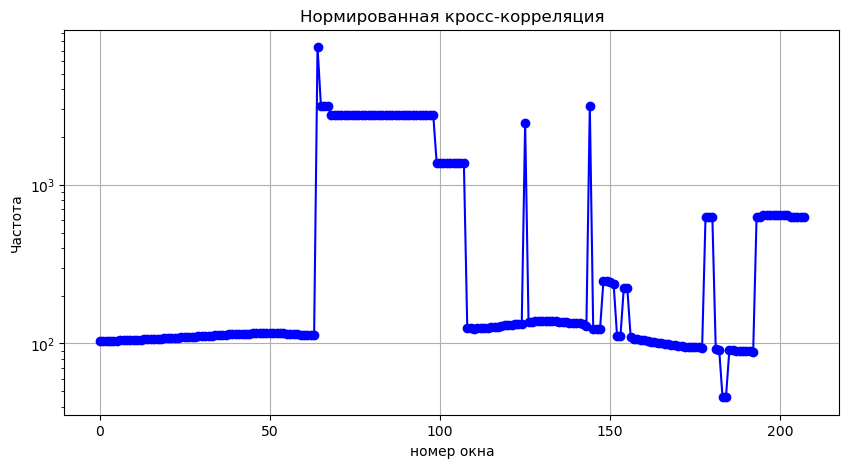

In [126]:
import matplotlib.pyplot as plt

# Данные для построения графика (предположим, что у вас есть список данных data)

# Создание списка индексов для данных
indices = list(range(len(P_T)))

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(indices, P_T, marker='o', color='b', linestyle='-')
plt.xlabel('номер окна')
plt.ylabel('Частота')
plt.title('Нормированная кросс-корреляция')
plt.grid(True)
plt.yscale('log')
plt.show()

In [113]:
def diff_mean(sp):
    W = len(sp)
    R = np.zeros(W)
    n2 = 0
    n1 = np.linalg.norm(sp)
    for tau in range(W):
        sum = 0
        for j in range(W - tau):
            if(j+tau < W):
                sum += sp[j] - sp[j+tau]
        
        R[tau] = sum/(W - tau)
    return R

def find_local_maxima(arr):
    local_maxima = []
    indx = []
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            local_maxima.append(arr[i])
            indx.append(i)
    return local_maxima, indx

def peak(arr,indx1, indx2):
    max = 0
    m_i = 0
    for i in range(len(arr)):
        if((arr[i] > max) and ( 80 < indx1[indx2[i]])):
            max = arr[i]
            m_i = i
    return m_i
    
window = 1024
jump = 128
s = y
P_T = []
for i in range(0,len(s)-window,jump):
    sig = s[i:i+window]
    R = diff_mean(sig)
    T = np.argmin(R)
    P_T.append(sr/T)

/tmp/ipykernel_5419/2681673022.py:41: RuntimeWarning: divide by zero encountered in long_scalars
  P_T.append(sr/T)


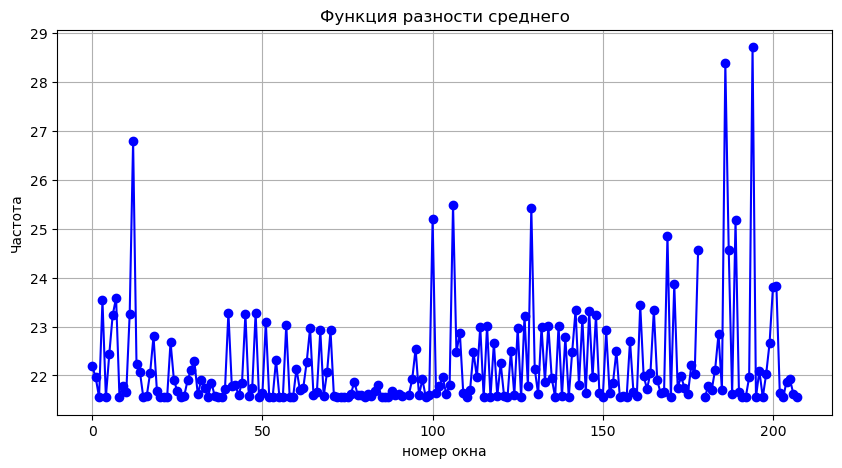

In [114]:
import matplotlib.pyplot as plt

# Данные для построения графика (предположим, что у вас есть список данных data)

# Создание списка индексов для данных
indices = list(range(len(P_T)))

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(indices, P_T, marker='o', color='b', linestyle='-')
plt.xlabel('номер окна')
plt.ylabel('Частота')
plt.title('Функция разности среднего')
plt.grid(True)
plt.show()